In [1]:
import networkx as nx
import localgraphclustering as lgc
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
# Verified the output with the relcond flow codes 2019-08-27 (it didn't change anything)

## Generate the graph 

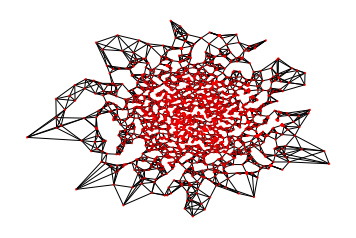

In [2]:
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph

"""
Generate m groups of n points that all have spatial variation sigma
with random coordinates. Add p additional points with spatial variation
rho. These determine the coordinates. Now, add edges to k nearest neighbors
and also within radius eps. 
""" 
def rand_size_geometric_block_model(n,m,sigma,p,rho,k,eps):
    # generate coordinates for each group mean.
    C = rho*np.random.randn(m,2)+np.array([rho/2,rho/2])
    X = np.zeros((0,2))
    for i in range(C.shape[0]):
        ng = np.random.randint(n+1)
        X = np.vstack([X,sigma/np.log10(ng)*np.random.randn(ng,2) + C[i,:]])
    # add random points. 
    X = np.vstack([X,rho*np.random.randn(p,2)])
    
    # see from sklearn.neighbors import NearestNeighbors
    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.radius_neighbors_graph.html
    A1 = kneighbors_graph(X, k, include_self=False)
    A2 = radius_neighbors_graph(X, eps, include_self=False)
    A = A1+A2
    N = nx.from_scipy_sparse_matrix(A)
    G = lgc.GraphLocal.from_networkx(N)
    G.discard_weights()
    return X,N,G

np.random.seed(1)
#X,N,G = geometric_block_model(150,10,0.05,1500,5.0,3,0.05,1)
X,N,G = rand_size_geometric_block_model(100,25,0.05,2000,5.0,5,0.06)
# add a few more edges

#plt.scatter(X[:,0], X[:,1])
G.draw(X,alpha=0.5)
G.discard_weights()


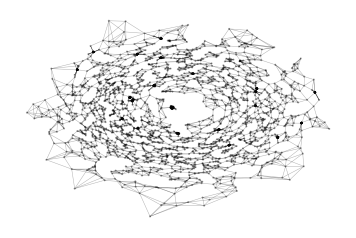

In [3]:
## See if we can get a slightly better drawing.
Xc = X-np.mean(X)
# look at each point and do a log-transform of the radial component
Xc = Xc/(2*np.max(Xc))
def radial_power(X,p):
    Xr = X.copy()
    offset = 0.00
    for i in range(Xr.shape[0]):
        #z = complex(Xr[i,0],Xr[i,1])
        r = np.linalg.norm(Xr[i,:])
        theta = np.arctan2(Xr[i,0],Xr[i,1])
        rt = (max(np.power(r+offset,p),np.power((r+offset),p)))-offset
        Xr[i,0] = rt*np.cos(theta)
        Xr[i,1] = rt*np.sin(theta)
    return Xr
#G.draw(radial_power(X,0.1))
G.draw(radial_power(Xc,0.6),edgealpha=0.3,nodesize=4,nodealpha=0.2,linewidth=0.5,nodecolor='k')
Xc = radial_power(Xc,0.6)

In [4]:
#np.argwhere(Xc[:,1] <= -0.7)
# tweak the lowest position
Xc[2878,1]=-0.71

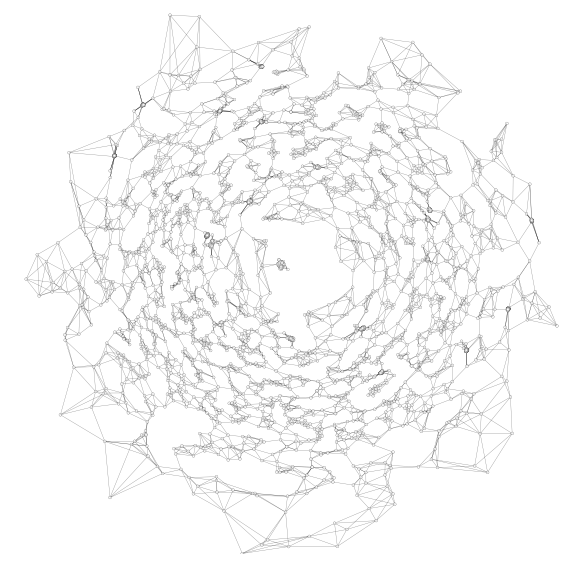

In [5]:
drawing = G.draw(Xc,edgealpha=0.5,
                 nodesize=8,nodealpha=1,
                 linewidth=0.3,nodecolor=['w'],figsize=(10,10))
drawing.nodewidth(range(G._num_vertices),0.2)
drawing.nodecolor(range(G._num_vertices),edgecolor='k',alpha=0.5)
plt.xlim([-0.712,0.64])
plt.ylim([-0.712,0.64])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

## Adjust to add few more edges

Here, we are going to find a few more nodes to fill in that center region

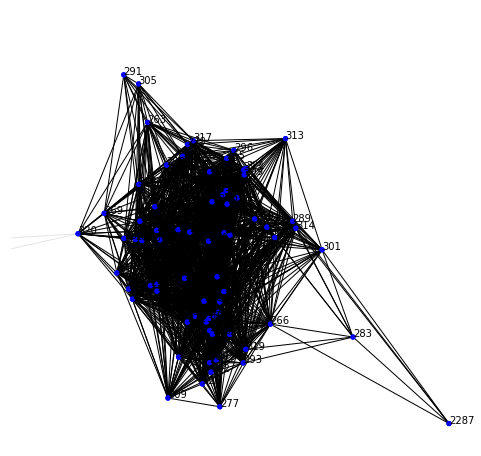

In [7]:
# This is going to label the target set 
drawing = G.draw(Xc,nodesize=2,alpha=0.5,nodecolor='#66c2a5',figsize=(8,8))
#plt.xlim([-0.2,0.2])
#plt.ylim([-0.2,0.2])
#plt.xlim([-0.13,-0.03])
#plt.ylim([-0.05,0.05])
plt.xlim([-0.07,-0.04])
plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
#S = range(1500,2000)
S = [        304,  302,  295,  299,  298,  297,  296,  294,  303,  266,  279,
        292,  290,  291,  289,  288,  287,  286,  285,  284,  277,  282,
        281,  268,  267,  265,  264,  263,  259,  260,  261,  305,  262,
        269,  270,  309,  278,  271,  272,  274,  275,  276,  273,  280,
        306,  307,  308,  310,  311,  312,  313,  314,  315,  316,  317,
        318,  319,  320,  321,  322,  323,  324,  325,  326,  327,  328,
        329,  293,  283,  300,  301, 2287]

drawing.highlight(S)
for x in S:
    plt.annotate(str(x),(Xc[x,0],Xc[x,1]))

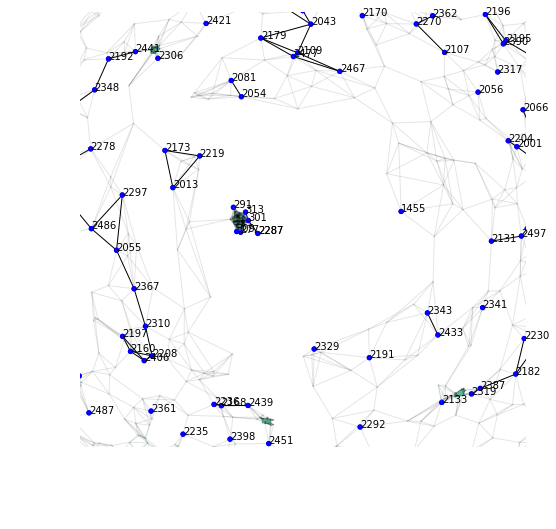

In [8]:
drawing = G.draw(Xc,nodesize=2,alpha=0.5,nodecolor='#66c2a5',figsize=(8,8))
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])
#plt.xlim([-0.13,-0.03])
#plt.ylim([-0.05,0.05])
#plt.xlim([-0.07,-0.04])
#plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
#S = range(1500,2000)
S = [291,313,301,277,309,2287,1455]
S.extend(range(2000,2500))
drawing.highlight(S)
for x in S:
    plt.annotate(str(x),(Xc[x,0],Xc[x,1]))

## Edges identified

The target group is

        304,  302,  295,  299,  298,  297,  296,  294,  303,  266,  279,
        292,  290,  291,  289,  288,  287,  286,  285,  284,  277,  282,
        281,  268,  267,  265,  264,  263,  259,  260,  261,  305,  262,
        269,  270,  309,  278,  271,  272,  274,  275,  276,  273,  280,
        306,  307,  308,  310,  311,  312,  313,  314,  315,  316,  317,
        318,  319,  320,  321,  322,  323,  324,  325,  326,  327,  328,
        329,  293,  283,  300,  301, 2287
        
we are going to add edges        

2287, 1455
2287, 1932
2287, 1994
301, 1994
291, 1567
291, 1670
309, 1760
277, 2329


In [9]:
#N = nx.from_scipy_sparse_matrix(A)
newedges = [2287, 1455, 
2287, 1932,
2287, 1994,
301, 1994,
291, 1567,
291, 1670,
309, 1760,
277, 2329]
for ei in range(0,len(newedges),2):
    N.add_edge(newedges[ei],newedges[ei+1])
G = lgc.GraphLocal.from_networkx(N)
G.discard_weights()


## First show a simple drawing

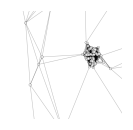

In [10]:
drawing = G.draw(Xc,edgealpha=0.25,nodesize=6,nodealpha=1,linewidth=0.5,nodecolor=['w'],figsize=(2,2))
drawing.nodewidth(range(G._num_vertices),0.2)
drawing.nodecolor(range(G._num_vertices),edgecolor='k',alpha=0.5)
plt.xlim([-0.13,-0.03])
plt.ylim([-0.05,0.05])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

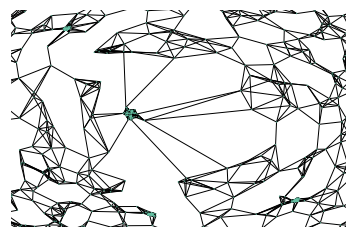

In [11]:
drawing = G.draw(Xc,nodesize=2,alpha=0.5,nodecolor='#66c2a5')
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

In [40]:
nodecolor='#222222'
edgecolor='#fdb462'
#hicolor='#fdb462'
#80BA5A
##4b4b8f
bigalpha=0.18
smallalpha=0.25
seed = 305
"""
#7F3C8D,#11A579,#3969AC,#F2B701,#E73F74,#80BA5A,#E68310,#008695,#CF1C90,#f97b72,#4b4b8f,#A5AA99
"""

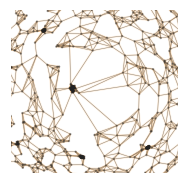

In [42]:
import matplotlib.patheffects as pe
drawing = G.draw(Xc,nodesize=2,
                 figsize=(3,3),nodecolor=nodecolor, edgecolor=edgecolor, 
                 linewidth=2)
drawing.highlight([],alpha=bigalpha)
stroke = [pe.withStroke(linewidth=0.5,foreground="#777777")]
drawing.edge_collection.set_path_effects(stroke)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

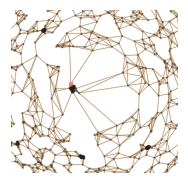

In [48]:
drawing = G.draw(Xc,nodesize=2,
                 figsize=(3,3),nodecolor=nodecolor, edgecolor=edgecolor, 
                 linewidth=2)
drawing.highlight([],alpha=bigalpha)
stroke = [pe.withStroke(linewidth=0.5,foreground="#777777")]
drawing.edge_collection.set_path_effects(stroke)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
drawing.nodesize([seed],12)
drawing.nodecolor([seed],'#fb8072',alpha=1)
plt.show()

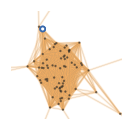

In [68]:
drawing = G.draw(Xc,nodesize=2,
                 figsize=(2,2),nodecolor=nodecolor, edgecolor=edgecolor, 
                 linewidth=2)
drawing.highlight([],alpha=0.25)
#drawing.nodewidth(range(G._num_vertices), 0.2)
stroke = [pe.withStroke(linewidth=0.25,foreground="#777777",alpha=0.5)]
drawing.edge_collection.set_path_effects(stroke)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.xlim([-0.07,-0.04])
plt.ylim([-0.005,0.025])
drawing.nodewidth([seed], 1.75)
drawing.nodecolor([seed],edgecolor='#3969AC',facecolor='w',alpha=1)
drawing.nodesize([seed],24)
plt.show()

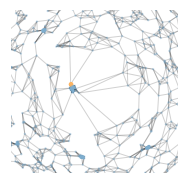

In [22]:
drawing = G.draw(Xc,nodesize=2,figsize=(3,3),nodecolor=nodecolor)
drawing.highlight([],alpha=bigalpha)
drawing.nodecolor([seed],hicolor,alpha=1)
drawing.nodesize([seed],12)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-region.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
plt.gcf().savefig("geograph-region.png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)
plt.show()

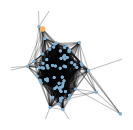

In [23]:
drawing = G.draw(Xc,nodesize=4,figsize=(2,2),nodecolor=nodecolor)
drawing.highlight([],alpha=0.25)
drawing.highlight([],otheredges=True,alpha=1)
plt.xlim([-0.07,-0.04])
plt.ylim([-0.005,0.025])
drawing.nodecolor([seed],hicolor,alpha=1)
drawing.nodesize([seed],18)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-region-zoom.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
plt.gcf().savefig("geograph-region-zoom.png",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)

In [30]:
outcolor='#fb8072'

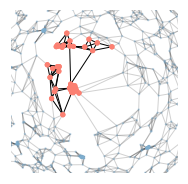

In [31]:
R,cond = lgc.spectral_clustering(G,[seed],method='l1reg')
drawing = G.draw(Xc,nodesize=2,figsize=(3,3),nodecolor=nodecolor)
drawing.highlight(R,alpha=bigalpha)
drawing.nodecolor(R,outcolor)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-"+str(seed)+"-l1reg.pdf",bbox_inches='tight',pad_inches=0,transparent=True)

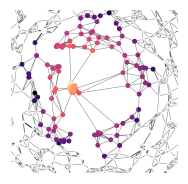

In [16]:
acl = lgc.approximate_PageRank(G,[305],normalize=False,method='l1reg')
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(3,3),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[acl[0],0],Xc[acl[0],1],c=np.log10(acl[1]),cmap=plt.magma(),s=15,zorder=3)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-"+str(seed)+"-l1reg-vec.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
plt.gcf().savefig("geograph-"+str(seed)+"-l1reg-vec.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)

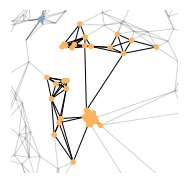

In [36]:
# show the spectral input to MQI
R,cond = lgc.spectral_clustering(G,[seed],method='l1reg')
drawing = G.draw(Xc,nodesize=2,figsize=(3,3),nodecolor=nodecolor)
drawing.highlight(R,alpha=bigalpha)
drawing.nodecolor(R,hicolor)
plt.xlim([-0.18,0.08])
plt.ylim([-0.08,0.18])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-"+str(seed)+"-mqi-input-zoom.pdf",bbox_inches='tight',pad_inches=0,transparent=True)

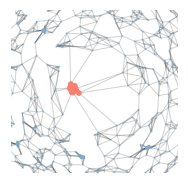

In [37]:
R,cond = lgc.spectral_clustering(G,[seed],method='l1reg')
S,cond = lgc.flow_clustering(G,R,method='mqi')
drawing = G.draw(Xc,nodesize=2,figsize=(3,3),nodecolor=nodecolor)
drawing.highlight(S,alpha=bigalpha)
drawing.nodecolor(S,outcolor)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-"+str(seed)+"-l1reg-mqi.pdf",bbox_inches='tight',pad_inches=0,transparent=True)

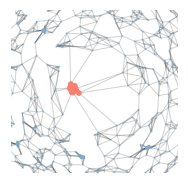

In [28]:
R = G.neighbors(305)
R.append(305)
S,cond = lgc.flow_clustering(G,R,method='sl',delta=0.1)
#S = R
drawing = G.draw(Xc,nodesize=2,figsize=(3,3),nodecolor=nodecolor)
drawing.highlight(S,alpha=bigalpha)
drawing.nodecolor(S,outcolor)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-"+str(seed)+"-neigh-sl.pdf",bbox_inches='tight',pad_inches=0,transparent=True)

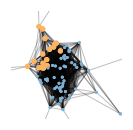

In [38]:
# Show a zoom in on the neighborhood
R = G.neighbors(305)
R.append(305)
S = R

drawing = G.draw(Xc,nodesize=4,figsize=(2,2),nodecolor=nodecolor)
drawing.highlight([],alpha=0.25)
drawing.highlight([],otheredges=True,alpha=1)
plt.xlim([-0.07,-0.04])
plt.ylim([-0.005,0.025])
drawing.nodecolor(S,hicolor,alpha=1)
drawing.nodesize(S,18)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-"+str(seed)+"-neigh-zoom.pdf",bbox_inches='tight',pad_inches=0,transparent=True)

In [24]:
Sacl,condacl = lgc.spectral_clustering(G,[320],method="acl") # one step
print(condacl)
Smqi,condmqi = lgc.flow_clustering(G,Sacl,method="mqi")
print(condmqi)



0.002787068004459309
0.0005704506560182544


(-0.2, 0.1)

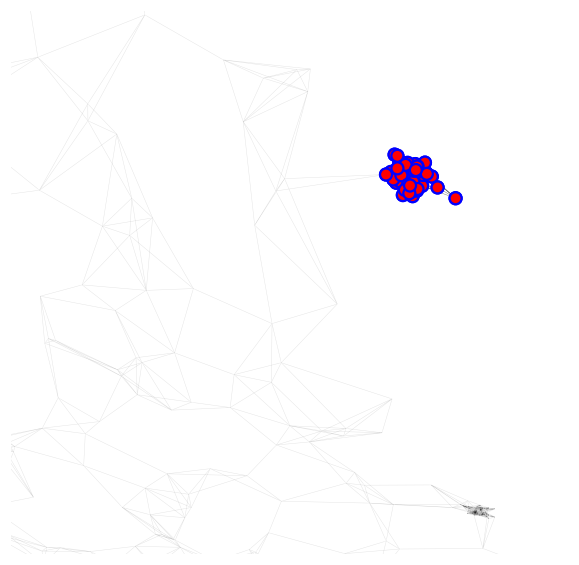

In [25]:
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(10,10),edgealpha=0.5,nodecolor='w')
drawing.highlight(Smqi)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.xlim([-0.2,0])
plt.ylim([-0.2,0.1])

0.03540903540903541
0.02711323763955343
0.007503410641200546


Text(0.5,1,'SimpleLocal -- $\\phi = 0.0075$')

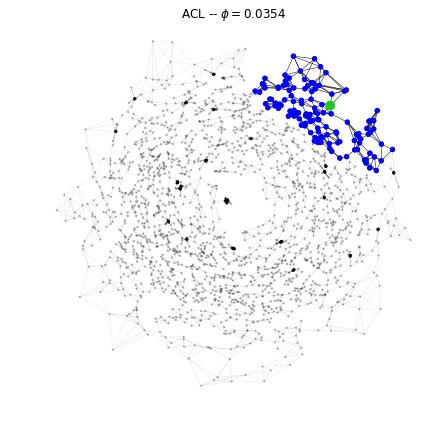

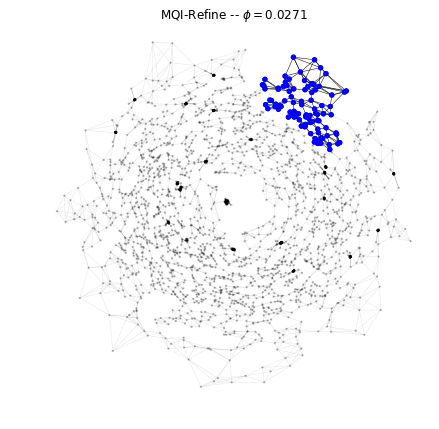

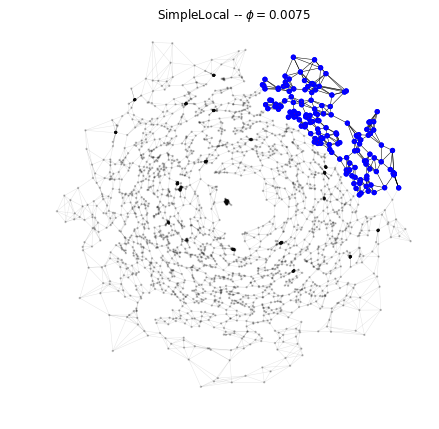

In [26]:
seed = [1500]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5,figsize=(7,7))
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.title(r'ACL -- $\phi = %.4f$'%(cond))
print(cond)


R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5,figsize=(7,7))
drawing.highlight(R)
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="sl",delta=0.001)
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5,figsize=(7,7))
drawing.highlight(R)
plt.title(r'SimpleLocal -- $\phi = %.4f$'%(cond))


In [ ]:
def ncpsetview(g,pos,ax=None,ncp=None,nbins=20,rholist=[1e-2,1e-3,1e-4]):
    fig,axs = plt.subplots(4,5, figsize=(8,8))
    axs = axs.flatten()
    
    # We need to be a bit hacky here because feature_by_group_min_line
    # assumes you are plotting. So if the ax=None, then we don't want
    # to plot the line at all, instead, what we do is just plot 
    # to the first set of axes that will get the graph eventually.
    # then we clear
    
    if ax is None:
        lineax = axs[0]
    else:
        lineax = ax
    if ncp is None:
        ncp = lgc.NCPData(g).approxPageRank(rholist=rholist)
    setdata = lgc.NCPPlots(ncp).feature_by_group_min_line(
            "output_cond","output_sizeeff", ax=lineax, label="", nbins=nbins)
    if ax is None: 
        lineax.clear()
    for ax in axs:
        ax.axis('off')
    for i,d in enumerate(setdata):
        S,cond = ncp.output_set(int(d[2])) # get the output set
        #SN = [ id2nx[v] for v in S ]
        #R = set(N)
        #R -= set(SN)
        # make sure we always look at the small size
        #if len(R) < len(SN):
            #R, SN = SN, R # swap!
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], alpha=0.5, node_size=8)
        #print(S)
        
        drawing = g.draw(pos,axs=axs[i],linewidth=0.5,edgealpha=0.3,nodecolor='k',nodesize=2,nodealpha=0.5)
        drawing.highlight(S)
        
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], alpha=0.5, node_size=2, node_color='k', nodelist=list(R))
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], node_size=14, nodelist=list(SN), node_color='r')
        #nx.draw_networkx_edges(N, pos, ax=axs[i], alpha=0.5, width=0.5)
        axs[i].set_title('|S|=' + str(len(S)) + '\ncond=%.4f'%(d[1]),fontsize=10)
        axs[i].axis('tight')
    return fig
ncpsetview(G,Xc,ncp=ncp)


In [27]:
seed = [320]
S,cond = lgc.spectral_clustering(G,seed)

In [28]:
S,cond

(array([ 320, 1885, 2831, 1954, 1760,  305, 2982, 2013,  269,  263,  328,
         308,  287,  298, 1382, 2930, 2219,  282,  286,  280,  278,  267,
         270,  260,  316, 2173,  290,  276,  294,  271,  291, 1611,  279,
         317,  326, 1372,  262,  284,  297,  265,  296,  281,  324,  272,
         312,  309,  274,  306,  318,  322,  285,  323,  288,  304,  321,
         303,  315,  307,  327,  299,  261,  310,  311,  275,  268,  329,
         325,  295,  302,  259,  292,  273,  264,  277,  293,  319,  313,
         300,  289,  314,  266,  301, 2850,  283, 2664, 2287], dtype=uint32),
 0.002787068004459309)

(-0.2, 0.1)

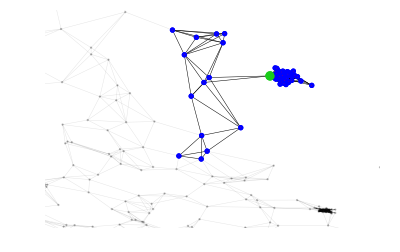

In [29]:
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.xlim([-0.2,0])
plt.ylim([-0.2,0.1])

In [30]:
R,cond = lgc.flow_clustering(G,S,method="mqi")
cond

0.0005704506560182544

(-0.2, 0.2)

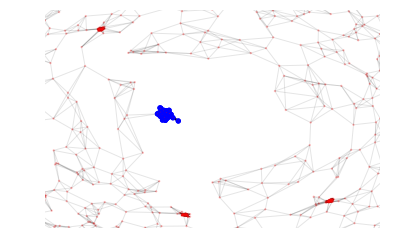

In [31]:
drawing = G.draw(Xc,nodesize=2)
drawing.highlight(R)
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])

0.02702702702702703
0.024657534246575342


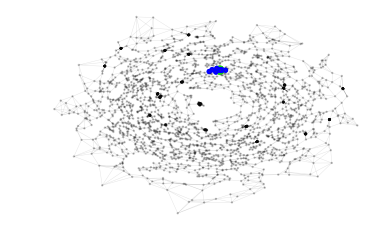

In [69]:

seed = [180]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
#plt.xlim([-0.2,0])
#plt.ylim([-0.2,0.1])
print(cond)
R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)

0.024657534246575342
0.024657534246575342


Text(0.5, 1.0, 'SimpleLocal -- $\\phi = 0.0247$')

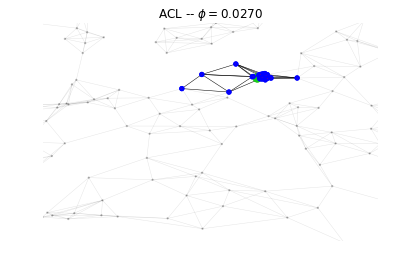

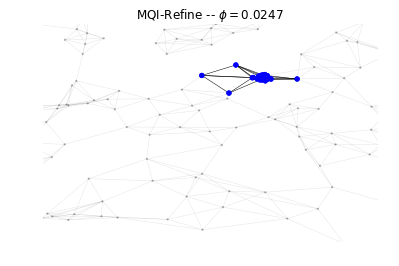

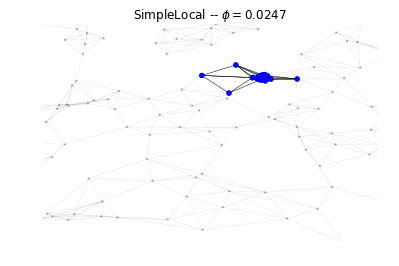

In [8]:

seed = [180]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.xlim([-0.1,0.1])
plt.ylim([0.1,0.3])
plt.title(r'ACL -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([-0.1,0.1])
plt.ylim([0.1,0.3])
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="sl",delta=0.1)
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([-0.1,0.1])
plt.ylim([0.1,0.3])
plt.title(r'SimpleLocal -- $\phi = %.4f$'%(cond))

0.013618677042801557
0.009881422924901186
0.0012590494176896443


Text(0.5, 1.0, 'SimpleLocal -- $\\phi = 0.0013$')

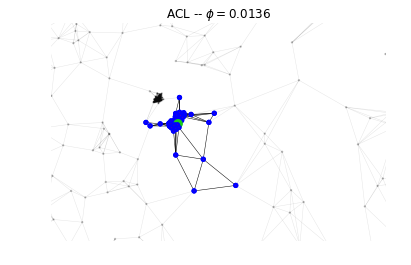

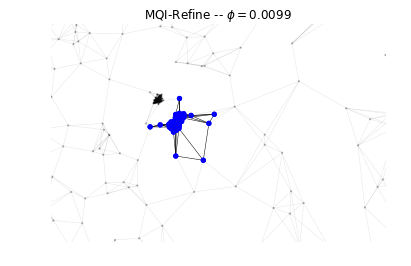

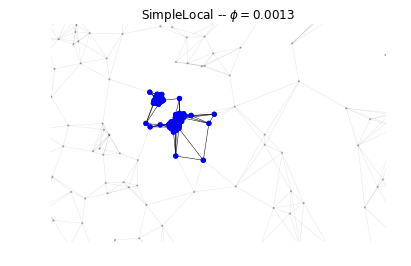

In [9]:
seed = [1000]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.xlim([-0.3,-0.1])
plt.ylim([-0.05,0.15])
plt.title(r'ACL -- $\phi = %.4f$'%(cond))
print(cond)


R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([-0.3,-0.1])
plt.ylim([-0.05,0.15])
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="sl",delta=0.01)
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([-0.3,-0.1])
plt.ylim([-0.05,0.15])
plt.title(r'SimpleLocal -- $\phi = %.4f$'%(cond))

0.03540903540903541
0.02711323763955343
0.007503410641200546


Text(0.5, 1.0, 'SimpleLocal -- $\\phi = 0.0075$')

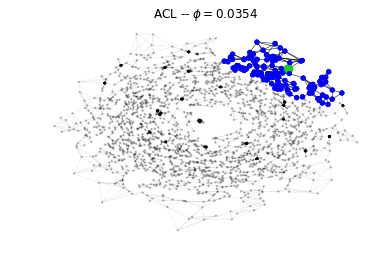

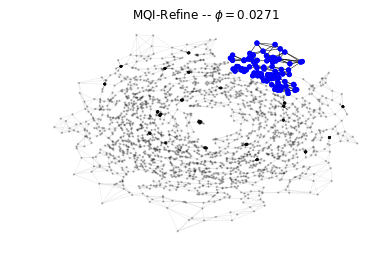

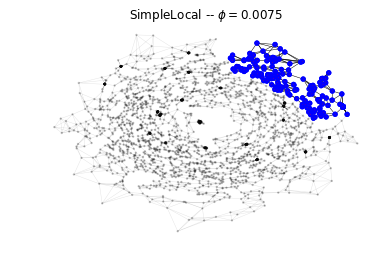

In [15]:
seed = [1500]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.title(r'ACL -- $\phi = %.4f$'%(cond))
print(cond)


R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="sl",delta=0.001)
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.title(r'SimpleLocal -- $\phi = %.4f$'%(cond))


In [16]:
len(R)

207

0.003376748673420164


Text(0.5, 1.0, 'MQI-Refine -- $\\phi = 0.0034$')

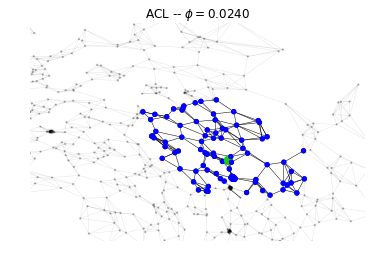

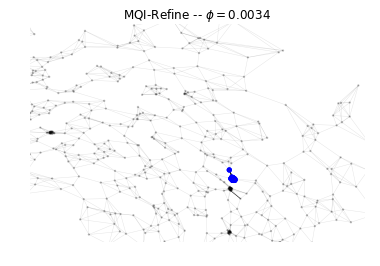

In [81]:

seed = [1800]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.xlim([0.0,0.5])
plt.ylim([0.0,0.5])
plt.title(r'ACL -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)

drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([0.0,0.5])
plt.ylim([0.0,0.5])
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

In [68]:
R,cond = lgc.flow_clustering(G,S,method="mqi")
cond

0.024657534246575342